## Sử dụng Pandas trong R  
Chúng ta cần sử dụng thư viện dplyr để giải quyết trường hợp sử dụng pandas trong R. Trước tiên, chúng ta sẽ bắt đầu bằng cách nhập thư viện khoa học dữ liệu thông thường  


In [28]:
options(warn=-1)
library(dplyr)
library(tidyverse)
library(lubridate)
library(zoo)
library(xts)
library('ggplot2')

Series giống như một danh sách hoặc mảng 1 chiều, nhưng có chỉ mục. Tất cả các thao tác đều được căn chỉnh theo chỉ mục. Khi lập chỉ mục hàng trong R, chúng ta phải sử dụng row.names.


In [29]:
a<- 1:9

In [30]:
b = c("I","like","to","use","Python","and","Pandas","very","much")

In [31]:
a1 = length(a)
b1 = length(b)

In [32]:
a = data.frame(a,row.names = c(1:a1))
print(a)

  a
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9


In [33]:
b = data.frame(b,row.names = c(1:b1))
print(b)

       b
1      I
2   like
3     to
4    use
5 Python
6    and
7 Pandas
8   very
9   much


Một trong những cách sử dụng phổ biến của series là chuỗi thời gian. Trong chuỗi thời gian, chỉ mục có một cấu trúc đặc biệt - thường là một phạm vi ngày hoặc thời gian. Cách dễ nhất để tạo chuỗi thời gian là sử dụng hàm ts. Nhưng chúng ta sẽ thử một cách khác để triển khai chuỗi thời gian. Chúng ta cần sử dụng thư viện lubridate để tạo một chỉ mục ngày bằng cách sử dụng hàm seq.

Giả sử chúng ta có một series hiển thị số lượng sản phẩm được mua mỗi ngày, và chúng ta biết rằng vào mỗi Chủ Nhật, chúng ta cũng cần lấy thêm một sản phẩm cho bản thân. Đây là cách mô hình hóa bằng series:


In [34]:
# We will use ggplot2 for visualizing the data
# If you want to change the plot size repr library will be used
library(repr)
options(repr.plot.width = 12,repr.plot.height=6)

[1] "length of index is  366"


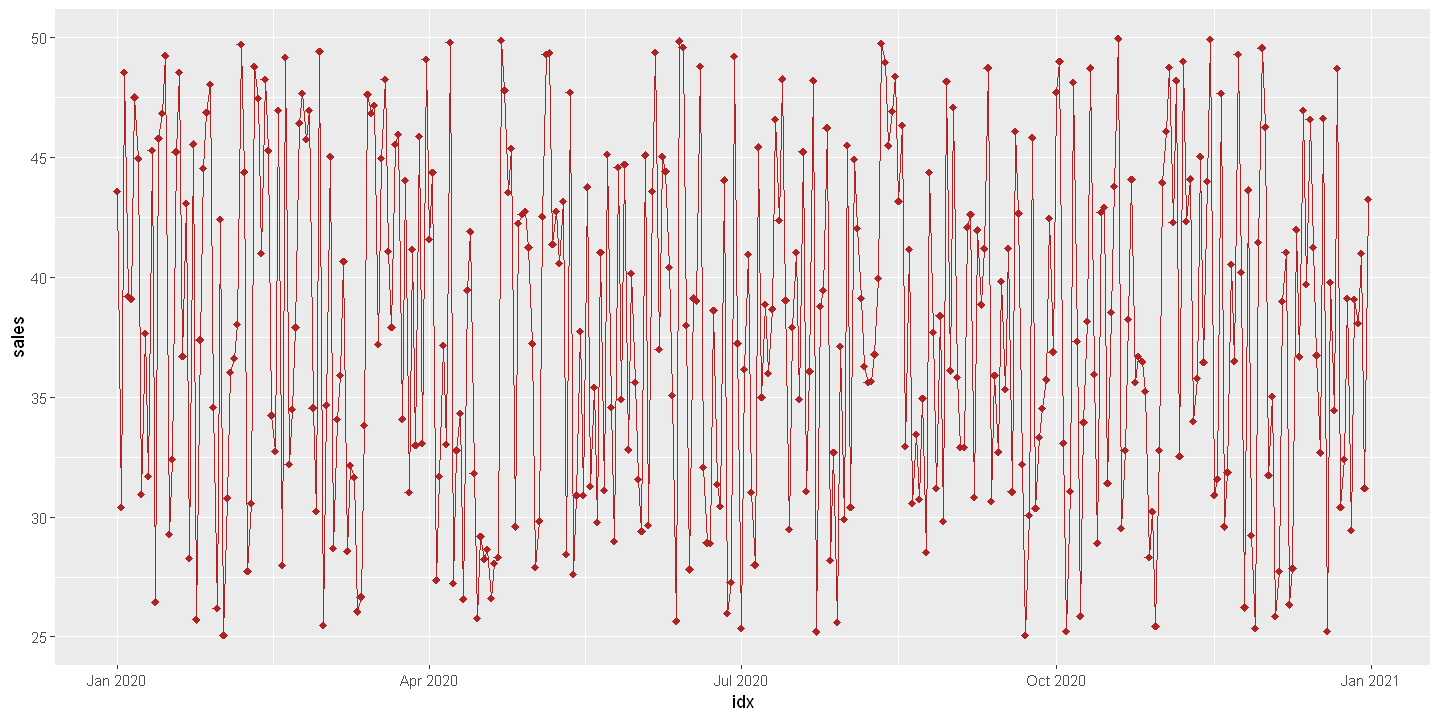

In [35]:
start_date <- mdy("Jan 1, 2020")
end_date <- mdy("Dec 31, 2020")
idx = seq(start_date,end_date,by ='day')
print(paste("length of index is ",length(idx)))
size = length(idx)
sales = runif(366,min=25,max=50)
sold_items <- data.frame(row.names=idx[0:size],sales)
ggplot(sold_items,aes(x=idx,y=sales)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", size = .3)

Chúng ta đang gộp additional_items và sold_items để có thể tìm tổng số sản phẩm.  
Như bạn thấy, chúng ta đang gặp vấn đề ở đây khi tìm tổng, chúng ta nhận được giá trị NaN vì trong chuỗi hàng tuần, các ngày không được đề cập được coi là thiếu (NaN). Nếu chúng ta cộng NaN với một số, kết quả sẽ là NaN.  
Để thực hiện phép cộng, chúng ta cần thay thế NaN bằng 0.  


In [36]:
index = seq(start_date,end_date,by = 'week')
sz = length(index)
additional_product <- rep(10,53)
additional_items  <- data.frame(row.names = index[0:sz],additional_product)
additional_items
# we are merging two dataframe so that we can add
additional_item = merge(additional_items,sold_items, by = 0, all = TRUE)[-1] 
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

additional_product
2020-01-01 10                
2020-01-08 10                
2020-01-15 10                
2020-01-22 10                
2020-01-29 10                
2020-02-05 10                
2020-02-12 10                
2020-02-19 10                
2020-02-26 10                
2020-03-04 10                
2020-03-11 10                
2020-03-18 10                
2020-03-25 10                
2020-04-01 10                
2020-04-08 10                
2020-04-15 10                
2020-04-22 10                
2020-04-29 10                
2020-05-06 10                
2020-05-13 10                
2020-05-20 10                
2020-05-27 10                
2020-06-03 10                
2020-06-10 10                
2020-06-17 10                
2020-06-24 10                
2020-07-01 10                
2020-07-08 10                
2020-07-15 10                
2020-07-22 10                
2020-07-29 10                
2020-08-05 10                
2020-08-12 10                
2020-08-19 10                
2020-08-26 10                
2020-09-02 10                
2020-09-09 10                
2020-09-16 10                
2020-09-23 10                
2020-09-30 10                
2020-10-07 10                
2020-10-14 10                
2020-10-21 10                
2020-10-28 10                
2020-11-04 10                
2020-11-11 10                
2020-11-18 10                
2020-11-25 10                
2020-12-02 10                
2020-12-09 10                
2020-12-16 10                
2020-12-23 10                
2020-12-30 10

total   
2020-01-01 53.59979
2020-01-02       NA
2020-01-03       NA
2020-01-04       NA
2020-01-05       NA
2020-01-06       NA
2020-01-07       NA
2020-01-08 40.93455
2020-01-09       NA
2020-01-10       NA
2020-01-11       NA
2020-01-12       NA
2020-01-13       NA
2020-01-14       NA
2020-01-15 59.24704
2020-01-16       NA
2020-01-17       NA
2020-01-18       NA
2020-01-19       NA
2020-01-20       NA
2020-01-21       NA
2020-01-22 38.26416
2020-01-23       NA
2020-01-24       NA
2020-01-25       NA
2020-01-26       NA
2020-01-27       NA
2020-01-28       NA
2020-01-29 44.58327
2020-01-30       NA
...        ...     
2020-12-02 41.74811
2020-12-03       NA
2020-12-04       NA
2020-12-05       NA
2020-12-06       NA
2020-12-07       NA
2020-12-08       NA
2020-12-09 37.85650
2020-12-10       NA
2020-12-11       NA
2020-12-12       NA
2020-12-13       NA
2020-12-14       NA
2020-12-15       NA
2020-12-16 46.73560
2020-12-17       NA
2020-12-18       NA
2020-12-19       NA
2020-12-20       NA
2020-12-21       NA
2020-12-22       NA
2020-12-23 40.42143
2020-12-24       NA
2020-12-25       NA
2020-12-26       NA
2020-12-27       NA
2020-12-28       NA
2020-12-29       NA
2020-12-30 41.20298
2020-12-31       NA

In [37]:
additional_item[is.na(additional_item)] = 0
total  = data.frame(row.names=idx[0:size],additional_item$additional_product + additional_item$sales)
colnames(total) =  c('total')
total

total   
2020-01-01 53.59979
2020-01-02 30.41127
2020-01-03 48.54839
2020-01-04 39.20897
2020-01-05 39.09894
2020-01-06 47.53019
2020-01-07 44.94766
2020-01-08 40.93455
2020-01-09 37.66561
2020-01-10 31.68825
2020-01-11 45.30576
2020-01-12 26.45509
2020-01-13 45.81249
2020-01-14 46.84547
2020-01-15 59.24704
2020-01-16 29.28688
2020-01-17 32.41731
2020-01-18 45.23295
2020-01-19 48.54330
2020-01-20 36.69353
2020-01-21 43.09588
2020-01-22 38.26416
2020-01-23 45.56863
2020-01-24 25.70944
2020-01-25 37.38721
2020-01-26 44.53955
2020-01-27 46.88427
2020-01-28 48.05540
2020-01-29 44.58327
2020-01-30 26.19490
...        ...     
2020-12-02 41.74811
2020-12-03 35.03915
2020-12-04 25.84637
2020-12-05 27.73147
2020-12-06 39.00993
2020-12-07 41.03187
2020-12-08 26.33862
2020-12-09 37.85650
2020-12-10 41.98943
2020-12-11 36.68901
2020-12-12 46.96883
2020-12-13 39.70374
2020-12-14 46.59464
2020-12-15 41.24742
2020-12-16 46.73560
2020-12-17 32.68275
2020-12-18 46.64238
2020-12-19 25.22163
2020-12-20 39.79997
2020-12-21 34.45013
2020-12-22 48.71183
2020-12-23 40.42143
2020-12-24 32.41991
2020-12-25 39.12296
2020-12-26 29.43616
2020-12-27 39.09337
2020-12-28 38.09288
2020-12-29 41.00681
2020-12-30 41.20298
2020-12-31 43.25232

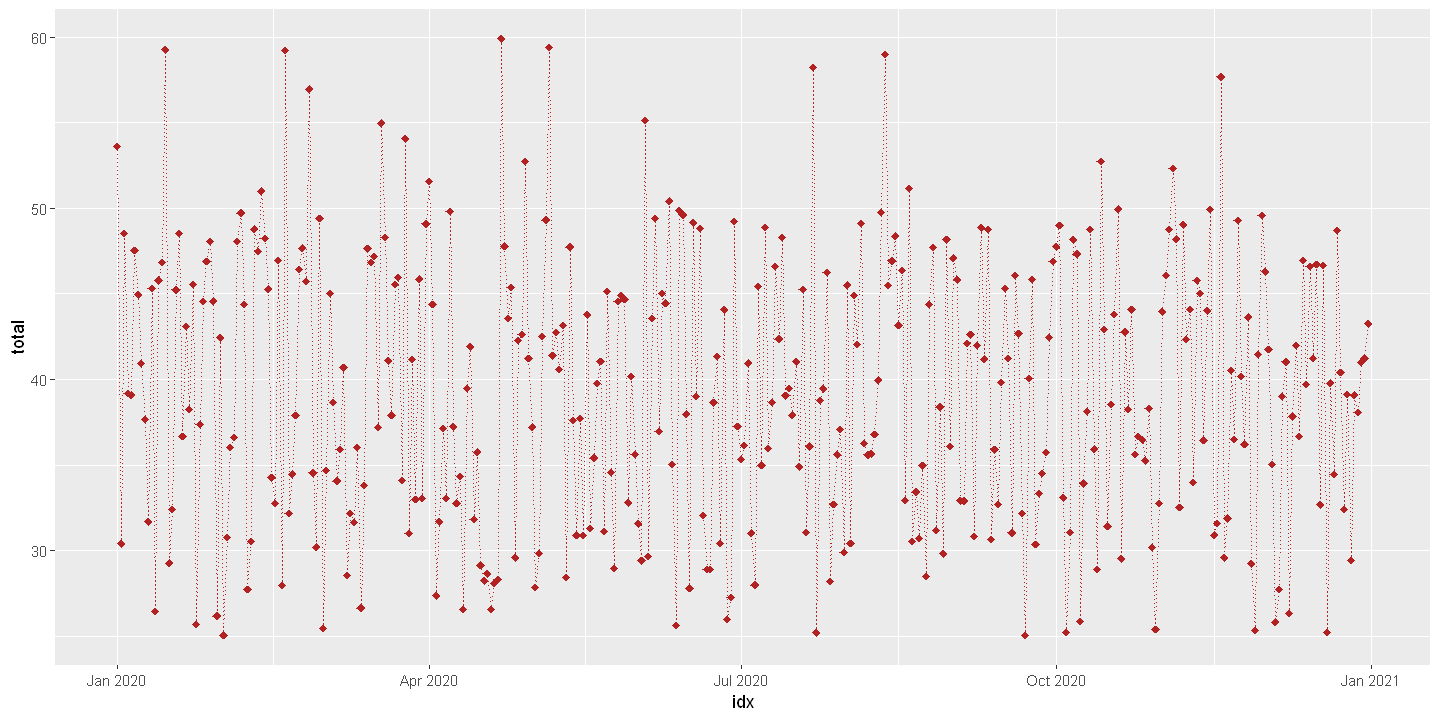

In [38]:
ggplot(total,aes(x=idx,y=total)) + geom_point(color = "firebrick", shape = "diamond", size = 2) +
    geom_line(color = "firebrick", linetype = "dotted", size = .3)

Chúng tôi muốn phân tích tổng số sản phẩm theo từng tháng. Do đó, chúng tôi tìm giá trị trung bình của tổng số sản phẩm trong một tháng và vẽ biểu đồ cột.


In [39]:
index = seq(start_date,end_date,by ='month')


              total
2020-01-31 41.03847
2020-02-29 40.91568
2020-03-31 39.27424
2020-04-30 37.63589
2020-05-31 38.75129
2020-06-30 38.75744
2020-07-31 38.35212
2020-08-31 40.43712
2020-09-30 38.90043
2020-10-31 37.99855
2020-11-30 41.20759
2020-12-31 38.46355

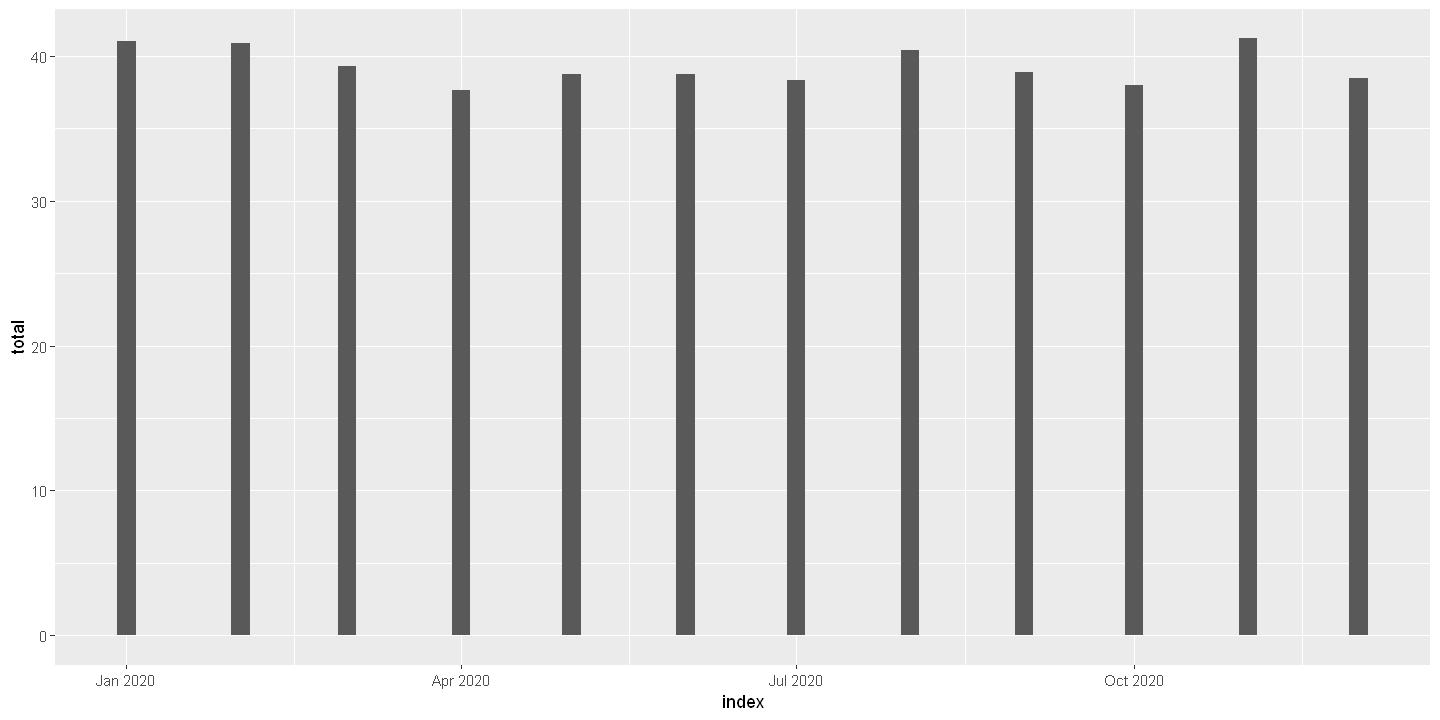

In [40]:
x<- as.xts(total, dateFormat ="Date")
(monthly<-apply.monthly(x,mean))
ggplot(monthly, aes(x=index, y=total)) + 
  geom_bar(stat = "identity", width=5) 

## DataFrame
DataFrame về cơ bản là một tập hợp các series có cùng chỉ số. Chúng ta có thể kết hợp nhiều series lại với nhau để tạo thành một DataFrame.  
Ví dụ, chúng ta đang tạo DataFrame từ các series a và b.


In [41]:
a = data.frame(a,row.names = c(1:a1))

In [42]:
b = data.frame(b,row.names = c(1:b1))

In [43]:
df<- data.frame(a,b)
df

a b     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

Chúng ta cũng có thể đổi tên cột bằng cách sử dụng hàm rename


In [44]:
df = 
  rename(df,
    A = a,
    B = b,
  )

In [45]:
df

A B     
1 1 I     
2 2 like  
3 3 to    
4 4 use   
5 5 Python
6 6 and   
7 7 Pandas
8 8 very  
9 9 much

Chúng ta cũng có thể chọn một cột trong dataframe bằng cách sử dụng hàm select


In [46]:
cat("Column A (series):\n")
select(df,'A')

Column A (series):


A
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9

Chúng tôi sẽ trích xuất các hàng đáp ứng một tiêu chí logic nhất định trên chuỗi


In [47]:
df[df$A<5,]

A B   
1 1 I   
2 2 like
3 3 to  
4 4 use

In [48]:
df[df$A>5 & df$A<7,]

A B  
6 6 and

Tạo cột mới.

Đoạn mã dưới đây tạo một series tính toán độ lệch của a so với giá trị trung bình của nó, sau đó gộp vào một dataframe hiện có.


In [49]:
df$DivA <- df$A - mean(df$A)

In [50]:
df

A B      DivA
1 1 I      -4  
2 2 like   -3  
3 3 to     -2  
4 4 use    -1  
5 5 Python  0  
6 6 and     1  
7 7 Pandas  2  
8 8 very    3  
9 9 much    4

Chúng tôi đang tạo một chuỗi tính độ dài của chuỗi trong cột A sau đó gộp vào dataframe hiện có


In [51]:
df$LenB <- str_length(df$B)

In [52]:
df

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3   
7 7 Pandas  2   6   
8 8 very    3   4   
9 9 much    4   4

Chọn các hàng dựa trên số lượng


In [53]:
df[0:5,]

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6

***Nhóm nghĩa là nhóm nhiều cột dựa trên một số điều kiện nhất định và chúng ta sẽ sử dụng hàm summarise để xem sự khác biệt***

Giả sử chúng ta muốn tính giá trị trung bình của cột A cho mỗi giá trị LenB được cho. Khi đó, chúng ta có thể nhóm DataFrame của mình theo LenB và tìm giá trị trung bình, đặt tên chúng là a.


In [54]:
df1 = df %>% group_by(LenB) %>% summarise(a = mean(A))

In [55]:
df1

LenB a       
1 1    1.000000
2 2    3.000000
3 3    5.000000
4 4    6.333333
5 6    6.000000

In [56]:
df2 = df %>% group_by(LenB) %>%
summarise(MEAN = mean(A),count =length(DivA))

## In ấn và Vẽ đồ thị
Khi chúng ta gọi head(df), nó sẽ hiển thị dataframe dưới dạng bảng.

Bước đầu tiên của bất kỳ dự án khoa học dữ liệu nào là làm sạch dữ liệu và trực quan hóa, do đó việc trực quan hóa tập dữ liệu và trích xuất một số thông tin hữu ích là rất quan trọng.


In [57]:
#dataset = read.csv("file name")

In [58]:
head(df)

A B      DivA LenB
1 1 I      -4   1   
2 2 like   -3   4   
3 3 to     -2   2   
4 4 use    -1   3   
5 5 Python  0   6   
6 6 and     1   3

ggplot2 là một thư viện rất tốt vì nó đơn giản để tạo các biểu đồ phức tạp từ dữ liệu trong một data frame.

Nó cung cấp một giao diện lập trình hơn để chỉ định các biến cần vẽ, cách chúng được hiển thị và các thuộc tính hình ảnh tổng quát.


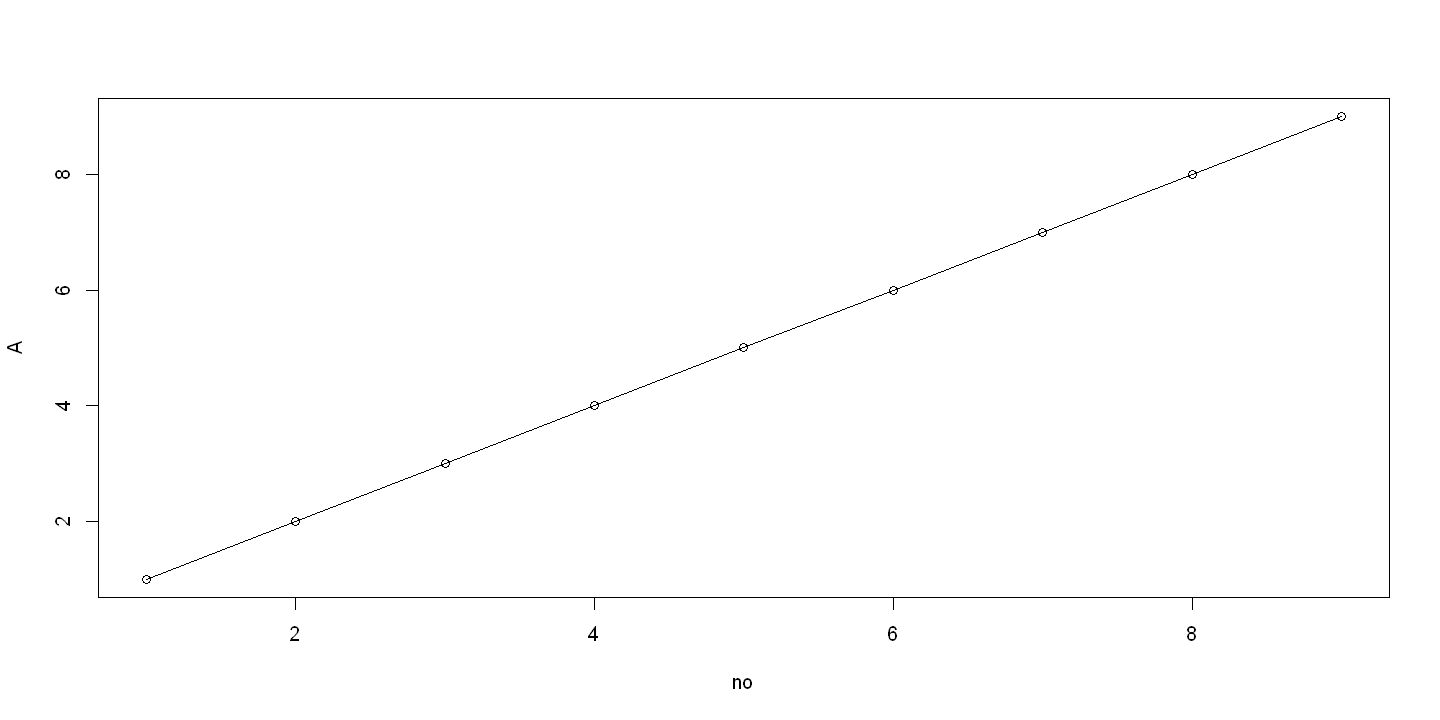

In [59]:
plot(df$A,type = 'o',xlab = "no",ylab = "A")

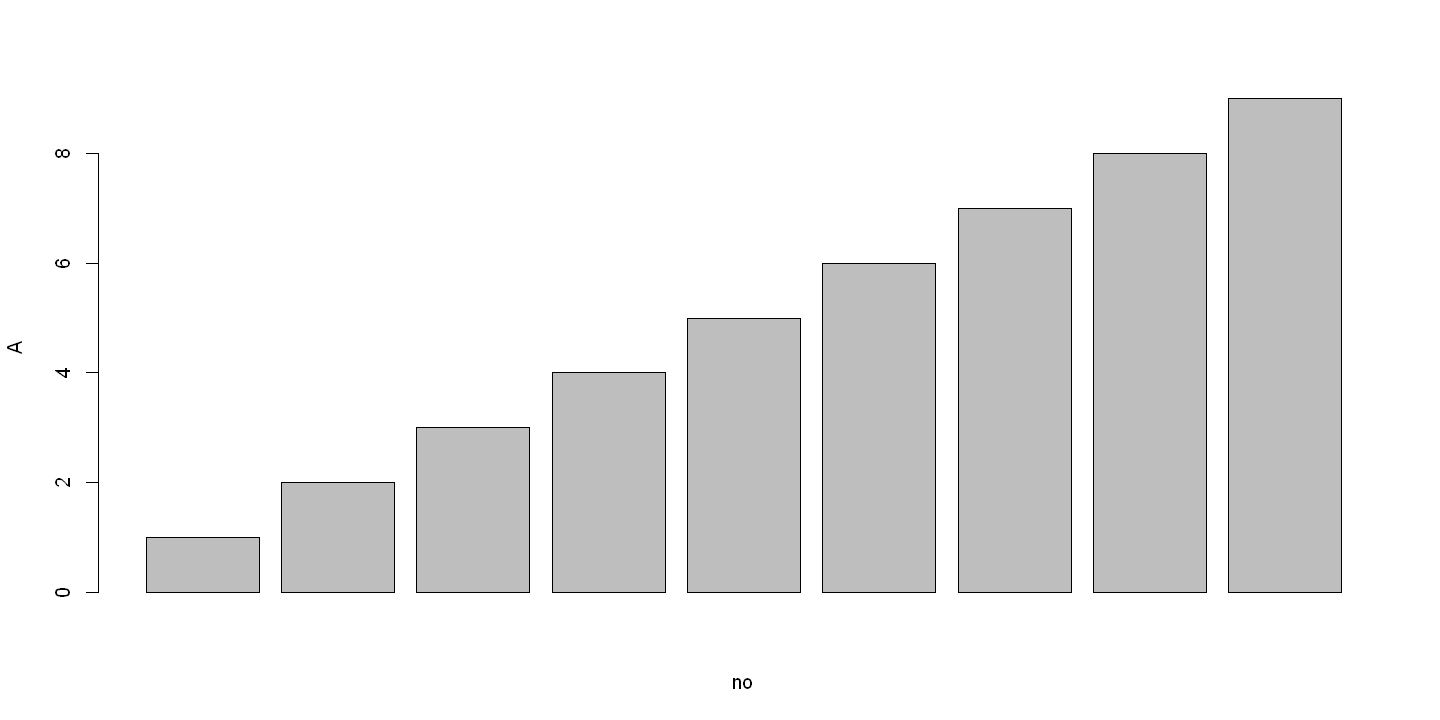

In [60]:
barplot(df$A, ylab = 'A',xlab = 'no')


---

**Tuyên bố miễn trừ trách nhiệm**:  
Tài liệu này đã được dịch bằng dịch vụ dịch thuật AI [Co-op Translator](https://github.com/Azure/co-op-translator). Mặc dù chúng tôi cố gắng đảm bảo độ chính xác, xin lưu ý rằng các bản dịch tự động có thể chứa lỗi hoặc không chính xác. Tài liệu gốc bằng ngôn ngữ bản địa nên được coi là nguồn tham khảo chính thức. Đối với các thông tin quan trọng, nên sử dụng dịch vụ dịch thuật chuyên nghiệp của con người. Chúng tôi không chịu trách nhiệm cho bất kỳ sự hiểu lầm hoặc diễn giải sai nào phát sinh từ việc sử dụng bản dịch này.
